IMPORTING LIBRARIES

In [65]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules

In [66]:
movies=pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [68]:
movies_clean=pd.get_dummies(movies,columns=['V1','V2','V3','V4','V5'])
movies_clean

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


ASSOSCIATION RULES

In [83]:
frequent_itemsets=apriori(movies_clean,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ..."
1393,0.1,"(V2_LOTR1, LOTR1, Sixth Sense, V5_LOTR2, Green..."
1394,0.1,"(Harry Potter1, V2_LOTR1, Sixth Sense, V5_LOTR..."
1395,0.1,"(Harry Potter1, V2_LOTR1, LOTR1, V5_LOTR2, Gre..."


In [84]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(Green Mile),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64212,(V1_Sixth Sense),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64213,(V3_Harry Potter1),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64214,(V4_Green Mile),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


EXPEREMINTING WITH SUPPORT AND CONFIDENCE

In [72]:
frequent_itemsets=apriori(movies_clean,min_support=0.2,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, Sixth ..."
77,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, Sixth ..."
78,0.4,"(V2_Patriot, V3_Sixth Sense, Sixth Sense, Patr..."
79,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, Patrio..."


In [73]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
649,(Gladiator),"(V2_Patriot, V3_Sixth Sense, Sixth Sense, Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
650,(V3_Sixth Sense),"(V2_Patriot, Gladiator, Sixth Sense, Patriot, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
651,(Sixth Sense),"(V2_Patriot, Gladiator, V3_Sixth Sense, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(Patriot),"(V2_Patriot, Gladiator, V3_Sixth Sense, Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [74]:
frequent_itemsets=apriori(movies_clean,min_support=0.3,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, Sixth ..."
59,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, Sixth ..."
60,0.4,"(V2_Patriot, V3_Sixth Sense, Sixth Sense, Patr..."
61,0.4,"(V2_Patriot, Gladiator, V3_Sixth Sense, Patrio..."


In [75]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(V1_Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Gladiator),"(V2_Patriot, V3_Sixth Sense, Sixth Sense, Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
598,(V3_Sixth Sense),"(V2_Patriot, Gladiator, Sixth Sense, Patriot, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
599,(Sixth Sense),"(V2_Patriot, Gladiator, V3_Sixth Sense, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(Patriot),"(V2_Patriot, Gladiator, V3_Sixth Sense, Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


EXPEREMENTING WITH THRESHOLD

In [76]:
frequent_itemsets=apriori(movies_clean,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ..."
1393,0.1,"(V2_LOTR1, LOTR1, Sixth Sense, V5_LOTR2, Green..."
1394,0.1,"(Harry Potter1, V2_LOTR1, Sixth Sense, V5_LOTR..."
1395,0.1,"(Harry Potter1, V2_LOTR1, LOTR1, V5_LOTR2, Gre..."


In [77]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
1,(LOTR1),(Harry Potter1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
2,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
3,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
4,(LOTR1),(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
...,...,...,...,...,...,...,...,...,...
61859,(Green Mile),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
61860,(V1_Sixth Sense),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
61861,(V3_Harry Potter1),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
61862,(V4_Green Mile),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [78]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
1,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
2,(V1_LOTR1),(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
3,(LOTR1),(V1_LOTR1),0.2,0.1,0.1,0.5,5.0,0.08,1.8
4,(LOTR1),(V2_LOTR1),0.2,0.1,0.1,0.5,5.0,0.08,1.8
...,...,...,...,...,...,...,...,...,...
61499,(Green Mile),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
61500,(V1_Sixth Sense),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.5,5.0,0.08,1.8
61501,(V3_Harry Potter1),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
61502,(V4_Green Mile),"(Harry Potter1, V2_LOTR1, LOTR1, Sixth Sense, ...",0.2,0.1,0.1,0.5,5.0,0.08,1.8


VISUALISATION

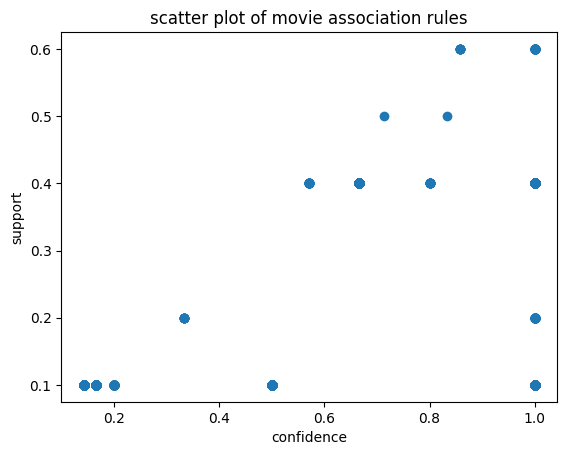

In [85]:
import matplotlib.pyplot as plt
plt.scatter(rules.confidence,rules.support)
plt.xlabel("confidence")
plt.ylabel("support")
plt.title("scatter plot of movie association rules")
plt.show()

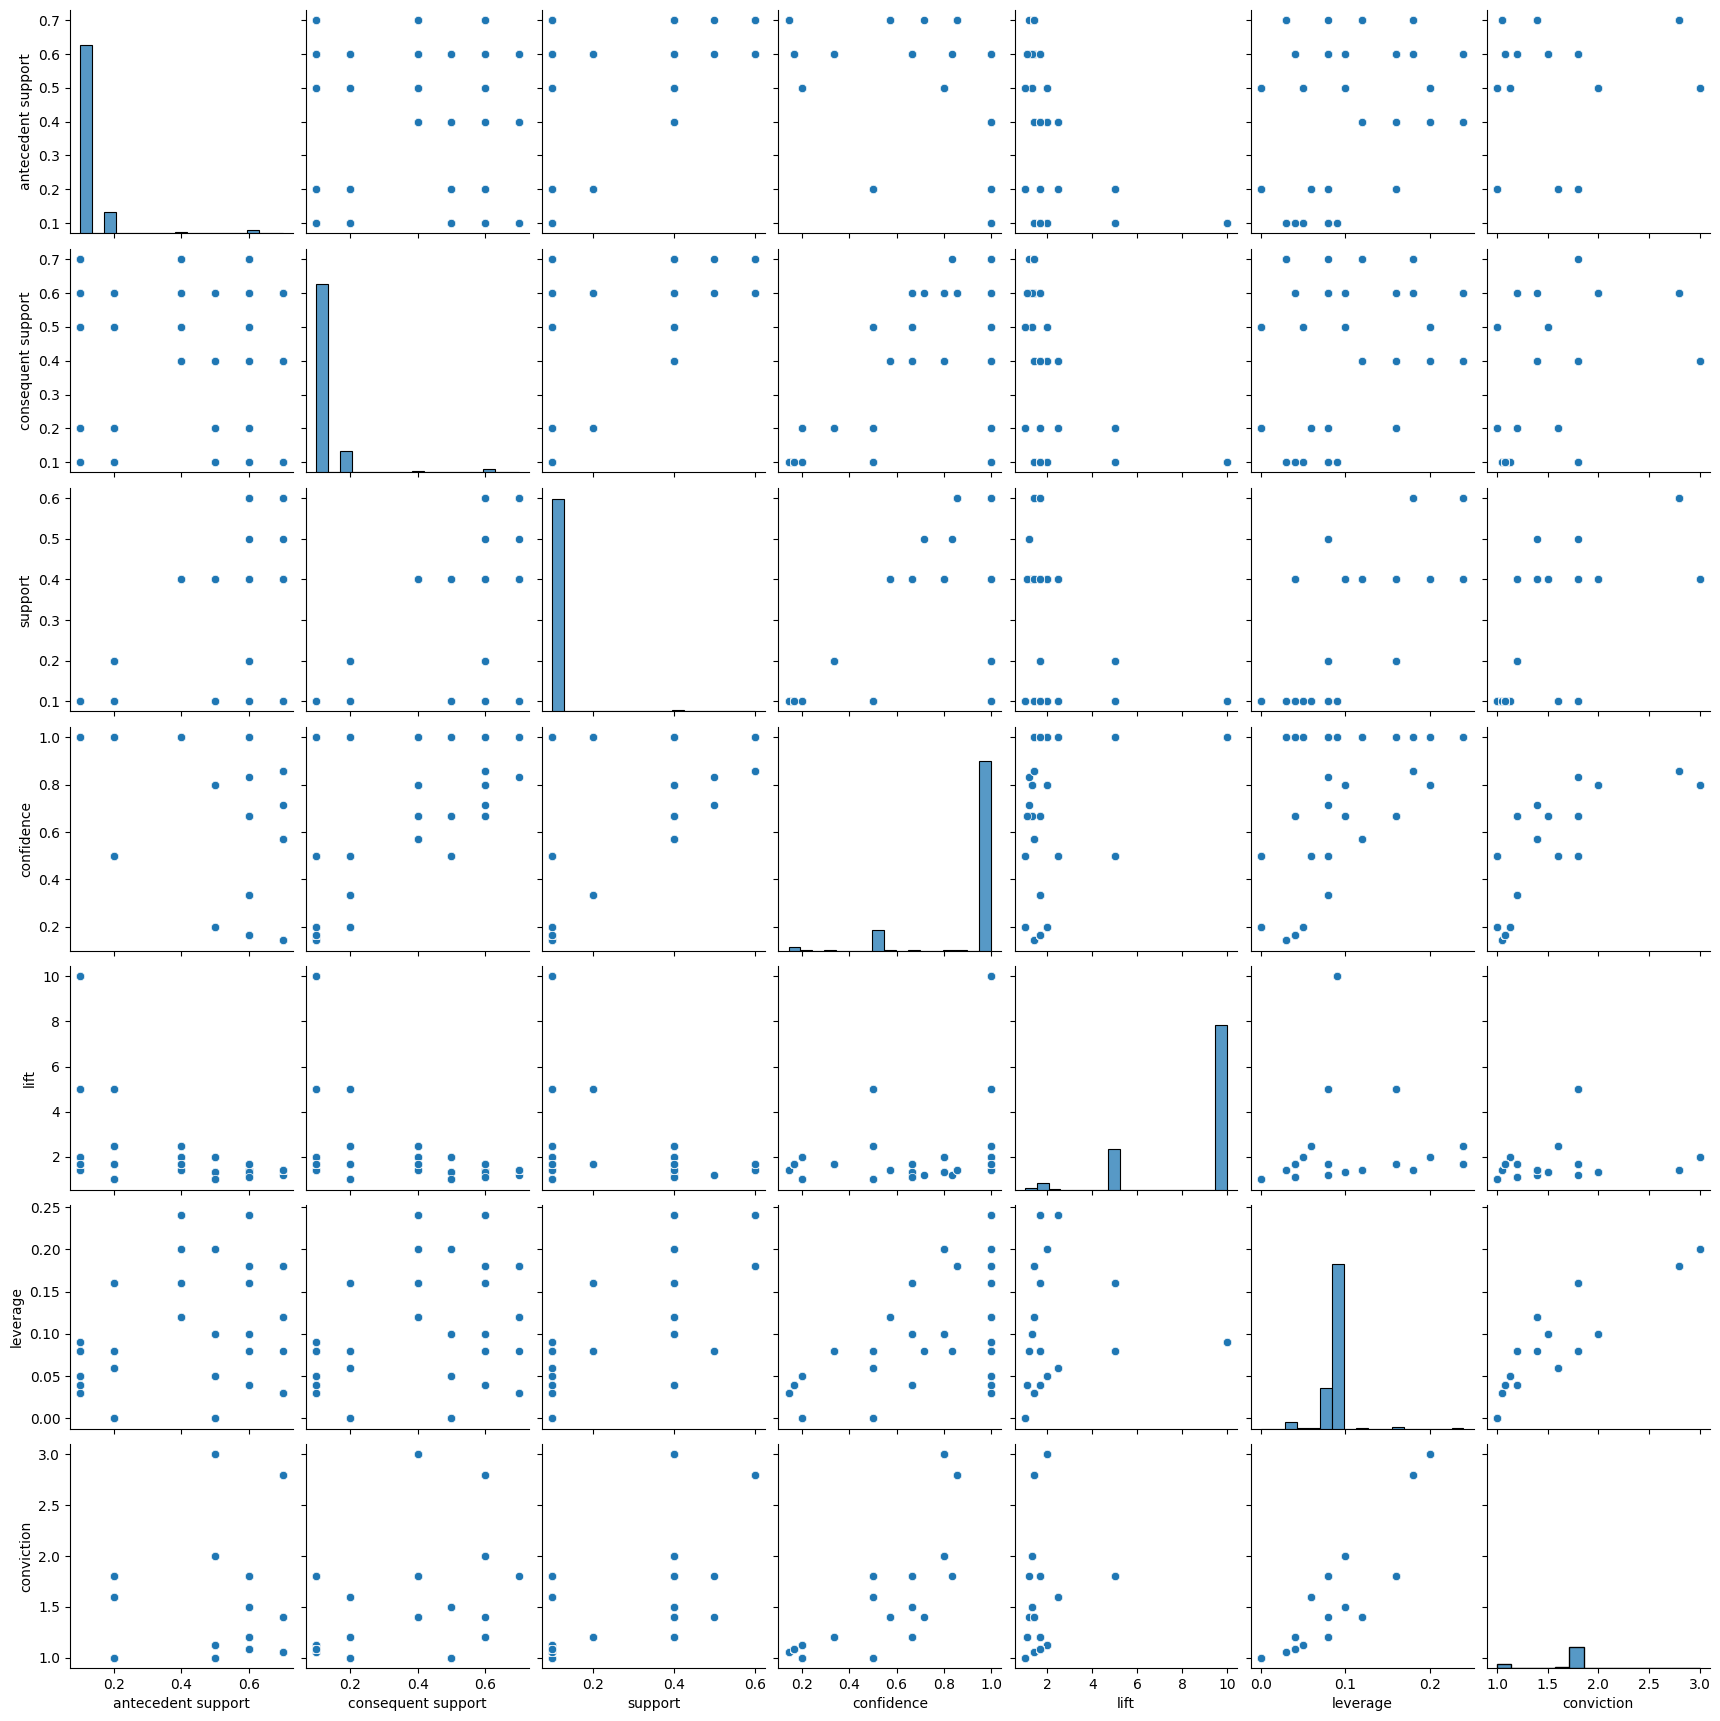

In [86]:
import seaborn as sns
sns.pairplot(rules)
plt.show()